<a href="https://colab.research.google.com/github/geetanjalisawant16/AutoML-and-Clustering-for-Market-segmentation/blob/main/Automl_evalml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Automl_Evalml Experiments for Market segmentation**:
##What is EvalML?
1. EvalML cuts down the process of model training and tuning by hand, this includes data quality checks and cross-validation. 
2. Data Checks and warnings: EvalML helps you in identifying the problem in the data before using or setting it up for modelling.
3. Pipeline building: EvalML helps you in constructing a highly optimized pipeline including state-of-the-art data preprocessing, feature engineering, feature selection, and a lot of modelling techniques.
4. Model Understanding: Just like Shap, Eli5, Lime, and other model explainability libraries EvalML also provides a broad level of understanding about the model you are building, for the purpose of presentation.
5. Domain-specific: This is the missing link in most of the AutoML libraries where you can define the objective of the problem. Once you have determined the objective for your business, you can provide that to EvalML to optimize by defining a custom objective function.










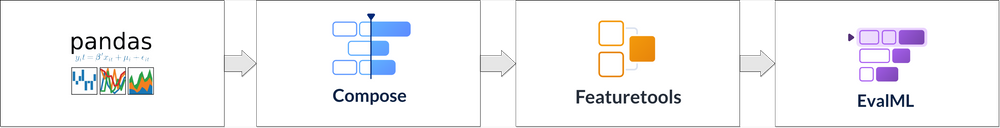

## Importing necessary libraries:

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
import pandas as pd

In [ ]:
!pip install evalml

     |████████████████████████████████| 6.3 MB 3.7 MB/s 
     |████████████████████████████████| 79.9 MB 76 kB/s 
     |████████████████████████████████| 5.8 MB 59.6 MB/s 
     |████████████████████████████████| 80 kB 13.0 MB/s 
     |████████████████████████████████| 10.3 MB 60.4 MB/s 
     |████████████████████████████████| 356 kB 76.9 MB/s 
     |████████████████████████████████| 327 kB 45.2 MB/s 
     |████████████████████████████████| 9.5 MB 59.5 MB/s 
     |████████████████████████████████| 296 kB 77.1 MB/s 
     |████████████████████████████████| 28.5 MB 1.2 MB/s 
     |████████████████████████████████| 135 kB 79.2 MB/s 
     |████████████████████████████████| 11.3 MB 55.1 MB/s 
     |████████████████████████████████| 15.7 MB 169 kB/s 
     |████████████████████████████████| 1.5 MB 61.9 MB/s 
     |████████████████████████████████| 1.6 MB 66.9 MB/s 
     |████████████████████████████████| 21.8 MB 1.3 MB/s 
     |████████████████████████████████| 101 kB 15.4 MB/s 
     |█████████

In [ ]:
!python -m pip install dask[dataframe] --upgrade

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


## Importing datasets from the google drive:

In [ ]:
import evalml
from evalml import AutoMLSearch

In [ ]:
from evalml.utils import infer_feature_types

# Assigning X, y features:

#Builing a model using EvalML tools:

In [ ]:
import os
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import tensorflow.keras.preprocessing as dir

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd


below 3 lines are from reference: https://www.datascienceprophet.com/regression-analysis-with-new-automl-framework-evalml/

In [ ]:
!pip install woodwork

##Final Pipeline building process:




In [ ]:
# Reading the csv file located in Google drive having added new RFM columns:
new_market = pd.read_csv('/content/drive/MyDrive/new_market.csv')

In [ ]:
new_market

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change,Sales,Amount,Class,Recency
0,0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7,90.00,90.00,Consumer discretionaryHermès International,373 days 04:05:00
1,1,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3,90.00,90.00,Consumer staplesL'Oréal,373 days 04:05:00
2,2,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7,90.00,90.00,Consumer discretionaryHermès International,373 days 04:05:00
3,3,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3,90.00,90.00,Consumer staplesL'Oréal,373 days 04:05:00
4,4,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7,45.00,45.00,Consumer discretionaryHermès International,373 days 04:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47824,48619,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,2011-08-25 11:27:00,1.25,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7,10.00,10.00,MaterialsBarrick Gold,106 days 01:23:00
47825,48620,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,2011-08-25 11:27:00,1.25,17844.0,Canada,87,Lululemon Athletica,Consumer discretionary,39.5,9.4,31.0,10.00,10.00,Consumer discretionaryLululemon Athletica,106 days 01:23:00
47826,48621,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,2011-08-25 11:27:00,0.83,17844.0,Canada,14,Shopify,Technology,97.6,51.5,111.7,6.64,6.64,TechnologyShopify,106 days 01:23:00
47827,48622,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,2011-08-25 11:27:00,0.83,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7,6.64,6.64,MaterialsBarrick Gold,106 days 01:23:00


Assingining X,y for further training and testing:

In [ ]:
y=new_market.Country #https://data-flair.training/blogs/train-test-set-in-python-ml/
X=new_market.drop('Country',axis=1)

In order to properly utilize Woodwork’s ‘Natural Language’ typing, we need to pass this argument in during initialization. Otherwise, this will be treated as an ‘Unknown’ type and dropped in the search.

In [ ]:
 X.ww.init(logical_types={"Description": "NaturalLanguage","Sector": "NaturalLanguage","Class": "NaturalLanguage","Recency":"NaturalLanguage"})

In [ ]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, problem_type='binary', test_size=0.2, random_seed=0)

In [ ]:
X_train.ww # checking logical types for all the dataset columns

,Physical Type,Logical Type,Semantic Tag(s)
Column,,,
Unnamed: 0,int64,Integer,['numeric']
InvoiceNo,category,Categorical,['category']
StockCode,category,Categorical,['category']
Description,string,NaturalLanguage,[]
Quantity,int64,Integer,['numeric']
InvoiceDate,datetime64[ns],Datetime,[]
UnitPrice,float64,Double,['numeric']
CustomerID,float64,Double,['numeric']
S.No,int64,Integer,['numeric']


In [ ]:
# AutomlSearch for best pipelines using the 'Multiclass' problem type due to the nature of data.
automl = AutoMLSearch(X_train=X_train,y_train = y_train,problem_type='multiclass')
automl

Using default limit of max_batches=1.

Generating pipelines to search over...
8 pipelines ready for search.


In [ ]:
automl.search() 
# Searching pipelines allowed in 'multiclass':linear_model, random_forest, lightgbm, extra_trees, xgboost, decision_tree, catboost



*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Multiclass. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: linear_model, random_forest, lightgbm, extra_trees, xgboost, decision_tree, catboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Multiclass Classification Pipeline
Mode Baseline Multiclass Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Log Loss Multiclass: 22.275

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Text Featurization Component + Imputer + DateTime Featurization Component + One Hot Encoder + Undersampler + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Multiclass: 0.024
	High coefficient of variation (cv >= 0.2) within cross validation scores.
	Elastic Net Classifier w/ Text Featurization Component + Imputer + DateTime Featurization Component + One Hot Encoder + Undersampler + Standard Scaler may not perform as estimated on unseen data.
Decision Tree Classifier w/ Text Featurization Component + Imputer + DateTime Featurization Component + One Hot Encoder + Undersampler:
	Starting cross validation
	Finished cross

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:51:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:53:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:54:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier w/ Text Featurization Component + Imputer + DateTime Featurization Component + One Hot Encoder + Undersampler:
	Starting cross validation
	Finished cross validation - mean Log Loss Multiclass: 0.002
	High coefficient of variation (cv >= 0.2) within cross validation scores.
	XGBoost Classifier w/ Text Featurization Component + Imputer + DateTime Featurization Component + One Hot Encoder + Undersampler may not perform as estimated on unseen data.
Extra Trees Classifier w/ Text Featurization Component + Imputer + DateTime Featurization Component + One Hot Encoder + Undersampler:
	Starting cross validation
	Finished cross validation - mean Log Loss Multiclass: 0.220
CatBoost Classifier w/ Text Featurization Component + Imp

In [ ]:
automl.rankings #Print model rankings and get the best pipeline.

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,4,LightGBM Classifier w/ Text Featurization Comp...,4,0.000010,0.000005,0.000016,99.999954,True,{'Imputer': {'categorical_impute_strategy': 'm...
1,6,XGBoost Classifier w/ Text Featurization Compo...,6,0.002484,0.000536,0.002671,99.988851,True,{'Imputer': {'categorical_impute_strategy': 'm...
2,5,Logistic Regression Classifier w/ Text Featuri...,5,0.008187,0.005463,0.002676,99.963245,True,{'Imputer': {'categorical_impute_strategy': 'm...
3,1,Elastic Net Classifier w/ Text Featurization C...,1,0.024242,0.016665,0.005350,99.891168,True,{'Imputer': {'categorical_impute_strategy': 'm...
4,3,Random Forest Classifier w/ Text Featurization...,3,0.174133,0.012345,0.159911,99.218264,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,7,Extra Trees Classifier w/ Text Featurization C...,7,0.220444,0.016134,0.203140,99.010358,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,2,Decision Tree Classifier w/ Text Featurization...,2,0.329973,0.142479,0.177186,98.518648,True,{'Imputer': {'categorical_impute_strategy': 'm...
7,8,CatBoost Classifier w/ Text Featurization Comp...,8,1.102654,0.005711,1.102134,95.049844,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Multiclass Classification Pipeline,0,22.275132,0.001373,22.274871,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"]) 
# Code reference from https://evalml.alteryx.com/en/stable/demos/text_input.html


*************************************************************************************************************************************
* LightGBM Classifier w/ Text Featurization Component + Imputer + DateTime Featurization Component + One Hot Encoder + Undersampler *
*************************************************************************************************************************************

Problem Type: multiclass
Model Family: LightGBM

Pipeline Steps
1. Text Featurization Component
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. DateTime Featurization Component
	 * features_to_extract : ['year', 'month', 'day_of_week', 'hour']
	 * encode_as_categories : False
	 * date_index : None
4. One Hot Encoder
	 * top_n : 10
	 * features_to_encode : None
	 * categories : None
	 * drop : if_binary
	 * handle_unknown : ignore
	 * handle_missing : error
5. Undersampler
	 * sa

In [ ]:
#We can now select best pipeline and score it on our holdout data:
b_pipeline = automl.best_pipeline

In [ ]:
# Prediction
prediction = pipeline.predict(x_test)

**LightGBM Classifier is the OPTIMAL/BEST model for the multiclass objective.
This model can be used to make predictions on the validation/test data or saved
for use later.**

In [ ]:
b_pipeline.save('Final_model.pkl')

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/Final_model.pkl','rb') as Final_model :

    Final_model = pickle.load(Final_model)

In [ ]:
Final_model

pipeline = MulticlassClassificationPipeline(component_graph={'Text Featurization Component': ['Text Featurization Component', 'X', 'y'], 'Imputer': ['Imputer', 'Text Featurization Component.x', 'y'], 'DateTime Featurization Component': ['DateTime Featurization Component', 'Imputer.x', 'y'], 'One Hot Encoder': ['One Hot Encoder', 'DateTime Featurization Component.x', 'y'], 'Undersampler': ['Undersampler', 'One Hot Encoder.x', 'y'], 'LightGBM Classifier': ['LightGBM Classifier', 'Undersampler.x', 'Undersampler.y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'DateTime Featurization Component':{'features_to_extract': ['year', 'month', 'day_of_week', 'hour'], 'encode_as_categories': False, 'date_index': None}, 'One Hot Encoder':{'top_n': 10, 'features_to_encode': None, 'categories': None, 'drop': 'if_binary', 'handle_unknown': 'ignore', 'handle_missing': 'error'}, 'Un


The optimal model has now changed to ExtraTreesClassifier. This model can be used to make predictions on the validation/test data or saved for use later.

In [ ]:
new_market

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change,Sales,Amount,Class,Recency
0,0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7,90.00,90.00,Consumer discretionaryHermès International,373 days 04:05:00
1,1,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3,90.00,90.00,Consumer staplesL'Oréal,373 days 04:05:00
2,2,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7,90.00,90.00,Consumer discretionaryHermès International,373 days 04:05:00
3,3,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3,90.00,90.00,Consumer staplesL'Oréal,373 days 04:05:00
4,4,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7,45.00,45.00,Consumer discretionaryHermès International,373 days 04:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47824,48619,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,2011-08-25 11:27:00,1.25,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7,10.00,10.00,MaterialsBarrick Gold,106 days 01:23:00
47825,48620,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,2011-08-25 11:27:00,1.25,17844.0,Canada,87,Lululemon Athletica,Consumer discretionary,39.5,9.4,31.0,10.00,10.00,Consumer discretionaryLululemon Athletica,106 days 01:23:00
47826,48621,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,2011-08-25 11:27:00,0.83,17844.0,Canada,14,Shopify,Technology,97.6,51.5,111.7,6.64,6.64,TechnologyShopify,106 days 01:23:00
47827,48622,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,2011-08-25 11:27:00,0.83,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7,6.64,6.64,MaterialsBarrick Gold,106 days 01:23:00


In [ ]:
automl.describe_pipeline(3)


******************************************************************************************************************************************
* Random Forest Classifier w/ Text Featurization Component + Imputer + DateTime Featurization Component + One Hot Encoder + Undersampler *
******************************************************************************************************************************************

Problem Type: multiclass
Model Family: Random Forest

Pipeline Steps
1. Text Featurization Component
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. DateTime Featurization Component
	 * features_to_extract : ['year', 'month', 'day_of_week', 'hour']
	 * encode_as_categories : False
	 * date_index : None
4. One Hot Encoder
	 * top_n : 10
	 * features_to_encode : None
	 * categories : None
	 * drop : if_binary
	 * handle_unknown : ignore
	 * handle_missing : error
5.

In [ ]:
pipeline = automl.get_pipeline(3)
print(pipeline.parameters)

{'Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Drop Columns Transformer': {'columns': ['Description', 'Sector', 'Class', 'Recency']}, 'DateTime Featurization Component': {'features_to_extract': ['year', 'month', 'day_of_week', 'hour'], 'encode_as_categories': False, 'date_index': None}, 'One Hot Encoder': {'top_n': 10, 'features_to_encode': None, 'categories': None, 'drop': 'if_binary', 'handle_unknown': 'ignore', 'handle_missing': 'error'}, 'Undersampler': {'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1, 'sampling_ratio_dict': None}, 'Random Forest Classifier': {'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1}}


In [ ]:
pipeline = automl.best_pipeline
pipeline.score(X_holdout, y_holdout, ["F1 Macro"])

OrderedDict([('F1 Macro', 1.0)])

We can also visualize the structure of the components contained by the pipeline:


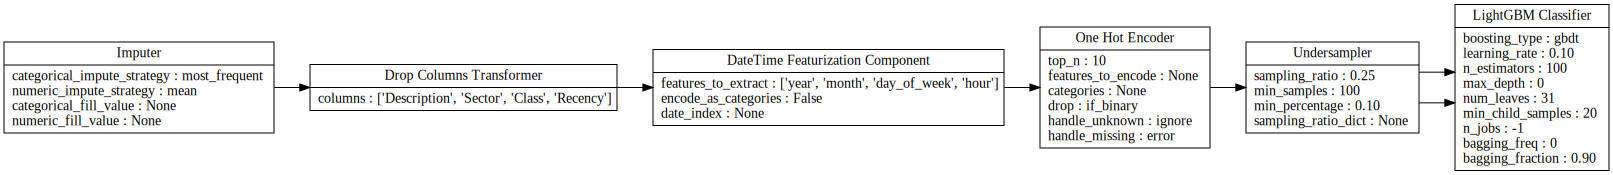

In [ ]:
pipeline.graph()

In [ ]:
pipeline.save()

In [ ]:
objective = F1()
pipeline = BinaryClassificationPipeline(component_graph=['Simple Imputer', 'DateTime Featurization Component', 'One Hot Encoder', 'Random Forest Classifier'])
pipeline.fit(X, y)
print(pipeline.threshold)
print(pipeline.score(X, y, objectives=[objective]))

y_pred_proba = pipeline.predict_proba(X)[True]
pipeline.threshold = objective.optimize_threshold(y_pred_proba, y)
print(pipeline.threshold)
print(pipeline.score(X, y, objectives=[objective]))

In [ ]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, problem_type='binary', test_size=.2)

In [ ]:
automl = AutoMLSearch(X_train=X_train, y_train=y_train,
                      problem_type='binary', objective='f1', max_batches=1)

Generating pipelines to search over...
Removing columns ['Class', 'Sector', 'Recency', 'Description'] because they are of 'Unknown' type
8 pipelines ready for search.


In [ ]:
from evalml import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary', objective='log loss binary', random_seed=0)
                      




Using default limit of max_batches=1.

Generating pipelines to search over...
Removing columns ['Class', 'Sector', 'Recency', 'Description'] because they are of 'Unknown' type
8 pipelines ready for search.


In [ ]:
market.isnull().sum()
# Checking the sum of all null values in the dataset.

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
S.No                0
Company             0
Sector              0
Market cap ($bn)    0
Market cap added    0
Change              0
dtype: int64

In [ ]:
cbm_pipeline_score = cbm_pipeline.score(X_holdout, y_holdout, [cost_benefit_matrix])
print (cbm_pipeline_score)

In [ ]:
# Calculate difference in profit made using both pipelines
profit_diff = total_profit_cbm - total_profit_ll
print (profit_diff)

Finally, we can graph the confusion matrices for both pipelines to better understand why the pipeline trained using the cost-benefit matrix is able to correctly classify more samples than the pipeline trained with log loss: we were able to correctly predict more cases where the customer would have churned (true positive), allowing us to intervene and prevent those customers from leaving.